In [1]:
import matplotlib.pyplot as plt
import uproot
import numpy as np
import pandas as pd

from pathlib import Path
import math
from sklearn.model_selection import train_test_split


events_num_identifier = "_15000_events"
pre_subdir_dataName = "fixedGlobT_"
subdir = "wSim_wReco"
save_data = True
path = "/nfs/dust/belle2/user/axelheim/MC_studies/my6modes/"
root_path = path + "rootfiles/" + subdir + '/'

In [10]:
raw_nTuples = uproot.concatenate([(root_path + "K_nTuples_mode*_15000_events.root"),
                                 (root_path + "pi_nTuples_mode*_15000_events.root"),
                                 (root_path + "gamma_nTuples_mode*_15000_events.root")])

In [11]:
df = pd.DataFrame({"event" : np.array(raw_nTuples["__event__"]),
       "mcPDG" : np.array(raw_nTuples["mcPDG"]),
       "mcPrimary":np.array(raw_nTuples["mcPrimary"]),
       "isSignal":np.array(raw_nTuples["isSignal"]),
       #"mcInitial":np.array(raw_nTuples["mcInitial"]),
       "pt" :  np.array(raw_nTuples["pt"]),
       "mcpt" :  np.array(raw_nTuples["mcPT"]),
                   
                   
       "p" :  np.array(raw_nTuples["p"]),
       "px" :  np.array(raw_nTuples["px"]),
       "py" : np.array(raw_nTuples["py"]),
       "pz" : np.array(raw_nTuples["pz"]),
       "E" : np.array(raw_nTuples["E"]),
                   
       "cosTheta" : np.array(raw_nTuples["cosTheta"]),
       "mcTheta" : np.array(raw_nTuples["mcTheta"]),
                   
                   
       "mcp" :  np.array(raw_nTuples["mcP"]),
       "mcpx" :  np.array(raw_nTuples["mcPX"]),
       "mcpy" : np.array(raw_nTuples["mcPY"]),
       "mcpz" : np.array(raw_nTuples["mcPZ"]),
       "mcE" : np.array(raw_nTuples["mcE"]),
                   
       "dx" : np.array(raw_nTuples["dx"]),
       "dy" : np.array(raw_nTuples["dy"]),
       "dz" : np.array(raw_nTuples["dz"]),
       "prodVertexX" : np.array(raw_nTuples["prodVertexX"]),
       "prodVertexY" : np.array(raw_nTuples["prodVertexY"]),
       "prodVertexZ" : np.array(raw_nTuples["prodVertexZ"]),
       "z0" : np.array(raw_nTuples["z0"]),
       "d0" : np.array(raw_nTuples["d0"]),
       "tanlambda" : np.array(raw_nTuples["tanlambda"]),
       "nCDCHits" : np.array(raw_nTuples["nCDCHits"]),
       "trackNECLClusters" : np.array(raw_nTuples["trackNECLClusters"]),

       "pionID":np.array(raw_nTuples["pionID"]),   
       "kaonID": np.array(raw_nTuples["kaonID"]),
       "M" : np.array(raw_nTuples["M"]),
       "charge" : np.array(raw_nTuples["charge"]),
       #"fromY4S" : hasAncestor_300553,
       "genPDG0" : np.array(raw_nTuples["genMotherPDG__bo0__bc"]),
       "genPDG1" : np.array(raw_nTuples["genMotherPDG__bo1__bc"]),
       "genPDG2" : np.array(raw_nTuples["genMotherPDG__bo2__bc"]),
       "genPDG3" :  np.array(raw_nTuples["genMotherPDG__bo3__bc"]) })

In [12]:
df

,event,mcPDG,mcPrimary,isSignal,pt,mcpt,p,px,py,pz,...,nCDCHits,trackNECLClusters,pionID,kaonID,M,charge,genPDG0,genPDG1,genPDG2,genPDG3
0,1,321.0,1.0,1.0,0.667690,0.666958,0.707409,0.323785,0.583929,0.233705,...,46.0,1.0,2.041922e-12,1.000000,0.493677,1.0,-421.0,-423.0,521.0,300553.0
1,1,-211.0,1.0,0.0,1.077028,1.073522,1.152855,-0.676673,-0.837916,0.411199,...,57.0,1.0,1.737859e-01,0.826181,0.493677,-1.0,-421.0,-423.0,521.0,300553.0
2,2,321.0,1.0,1.0,0.539081,0.540159,0.748879,0.473872,0.257011,-0.519818,...,31.0,1.0,2.955040e-01,0.629248,0.493677,1.0,-421.0,-423.0,521.0,300553.0
3,3,321.0,1.0,1.0,0.955342,0.947135,1.281696,-0.206944,-0.932659,0.854439,...,60.0,1.0,5.925684e-03,0.994071,0.493677,1.0,-421.0,-423.0,521.0,300553.0
4,4,321.0,1.0,1.0,0.652943,0.651471,0.800641,-0.334932,-0.560496,0.463348,...,60.0,1.0,1.979987e-07,1.000000,0.493677,1.0,-421.0,-423.0,521.0,300553.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831558,14999,NaN,NaN,NaN,0.216322,NaN,0.223587,0.006050,0.216238,-0.056530,...,NaN,NaN,NaN,NaN,0.000000,0.0,0.0,0.0,0.0,0.0
831559,14999,NaN,NaN,NaN,0.118181,NaN,0.129536,0.000926,0.118178,-0.053036,...,NaN,NaN,NaN,NaN,0.000000,0.0,0.0,0.0,0.0,0.0
831560,14999,NaN,NaN,NaN,0.226253,NaN,0.257174,-0.010697,0.226000,-0.122263,...,NaN,NaN,NaN,NaN,0.000000,0.0,0.0,0.0,0.0,0.0
831561,15000,22.0,1.0,1.0,0.124186,0.080072,0.132358,0.110914,0.055859,0.045786,...,NaN,NaN,NaN,NaN,0.000000,0.0,111.0,-423.0,521.0,300553.0


In [13]:
df.describe()

,event,mcPDG,mcPrimary,isSignal,pt,mcpt,p,px,py,pz,...,nCDCHits,trackNECLClusters,pionID,kaonID,M,charge,genPDG0,genPDG1,genPDG2,genPDG3
count,831563.000000,699591.000000,699591.000000,699591.000000,831563.000000,699591.000000,831563.000000,831563.000000,831563.000000,831563.000000,...,441435.000000,441435.000000,441435.000000,4.414350e+05,831563.000000,831563.000000,831563.000000,831563.000000,831563.000000,831563.000000
mean,7497.849455,8.144692,0.854155,0.896408,0.654872,0.762845,0.811535,0.037129,-0.004840,0.274146,...,53.807170,0.955722,0.703000,2.716416e-01,0.125147,0.006481,14.627616,72661.214500,56560.633906,106053.548489
std,4330.158561,199.696224,0.352951,0.304731,0.555870,0.547609,0.673749,0.606685,0.606943,0.547287,...,9.255157,0.205713,0.425068,4.281123e-01,0.164348,0.728566,358.078335,128629.399736,117452.046849,143619.959634
min,1.000000,-321.000000,0.000000,0.000000,0.029341,0.000000,0.100000,-14.611647,-5.520856,-1.582445,...,1.000000,0.000000,0.000000,6.182359e-272,0.000000,-1.000000,-521.000000,-521.000000,-521.000000,-521.000000
25%,3751.000000,-211.000000,1.000000,1.000000,0.157114,0.311561,0.201932,-0.202537,-0.244605,-0.035290,...,53.000000,1.000000,0.087665,1.585637e-16,0.000000,-1.000000,-411.000000,0.000000,0.000000,0.000000
50%,7497.000000,22.000000,1.000000,1.000000,0.507017,0.665066,0.643787,0.019513,-0.002732,0.111550,...,56.000000,1.000000,0.990864,1.266374e-07,0.139570,0.000000,111.000000,411.000000,0.000000,0.000000
75%,11251.000000,211.000000,1.000000,1.000000,1.011572,1.116515,1.252300,0.275999,0.230973,0.470850,...,58.000000,1.000000,0.999968,7.887938e-01,0.139570,1.000000,411.000000,521.000000,521.000000,300553.000000
max,15000.000000,3122.000000,1.000000,1.000000,15.619861,2.759388,17.548586,3.588251,3.245524,7.998299,...,97.000000,1.000000,1.000000,1.000000e+00,0.493677,1.000000,3122.000000,300553.000000,300553.000000,300553.000000


In [14]:
#df.to_pickle("/nfs/dust/belle2/user/axelheim/MC_studies/my6modes/pandas_df_saves/scatter_df.pkl")
df.to_csv("/nfs/dust/belle2/user/axelheim/MC_studies/my6modes/pandas_df_saves/scatter_df.csv")

### this step is necessary because the uproot works only with my conda environment but on my localhost jupyterhub server the plots make the kernel die

In [2]:
#df = pd.read_pickle("/nfs/dust/belle2/user/axelheim/MC_studies/my6modes/pandas_df_saves/scatter_df.pkl")
df = pd.read_csv("/nfs/dust/belle2/user/axelheim/MC_studies/my6modes/pandas_df_saves/scatter_df.csv")

In [3]:
df['mcTheta'] = df['mcTheta'].apply(np.cos)

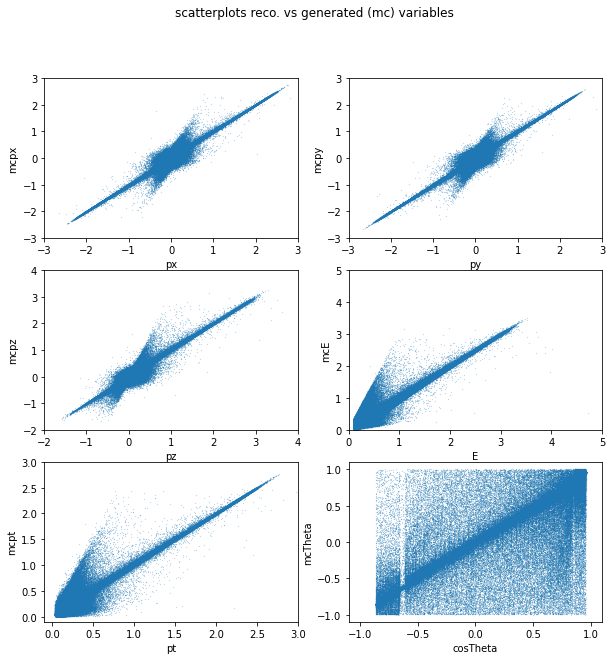

In [5]:
bins = np.linspace(0, 1, 10)
fig, axs = plt.subplots(3,2)
fig.suptitle('scatterplots reco. vs generated (mc) variables')
fig.set_size_inches(10, 10)

varList = [["px","mcpx"],["py","mcpy"],["pz","mcpz"],["E","mcE"],["pt","mcpt"],["cosTheta","mcTheta"]]
rangeXlist = [[-3,3],[-3,3],[-2,4],[0,5],[-0.1,3],[-1.1,1.1]]
rangeYlist = [[-3,3],[-3,3],[-2,4],[0,5],[-0.1,3],[-1.1,1.1]]

for i in range(6):
    #print("mode:",mode)
    axs_index0 = math.floor(i/2)
    axs_index1 = i % 2

    axs[axs_index0,axs_index1].scatter(df[varList[i][0]],df[varList[i][1]],s=0.01)

    axs[axs_index0,axs_index1].set_ylabel("{}".format(varList[i][1]))
    axs[axs_index0,axs_index1].set_xlabel("{}".format(varList[i][0]))
    
    axs[axs_index0,axs_index1].set_xlim(left=rangeXlist[i][0], right=rangeXlist[i][1])
    axs[axs_index0,axs_index1].set_ylim(bottom=rangeYlist[i][0], top=rangeYlist[i][1])

fig.savefig('scatter_reco_gen_all6Modes_gammaKpion.jpg')

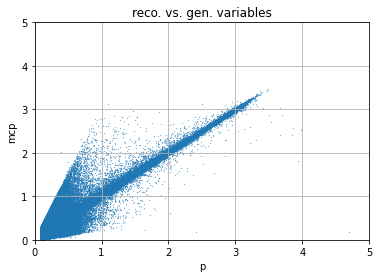

In [45]:
ax = df.plot.scatter("p","mcp",s=0.05)
ax.set_title("reco. vs. gen. variables")

lim_left = 0
lim_right = 5
ax.set_xlim(left=lim_left, right=lim_right)
ax.set_ylim(bottom=lim_left, top=lim_right)
ax.grid(b=True)

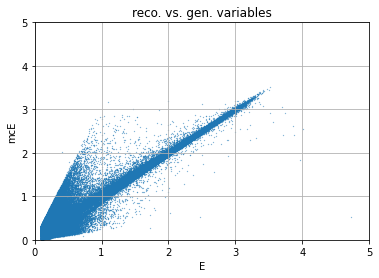

In [46]:
ax = df.plot.scatter("E","mcE",s=0.05)
ax.set_title("reco. vs. gen. variables")

lim_left = 0
lim_right = 5
ax.set_xlim(left=lim_left, right=lim_right)
ax.set_ylim(bottom=lim_left, top=lim_right)
ax.grid(b=True)

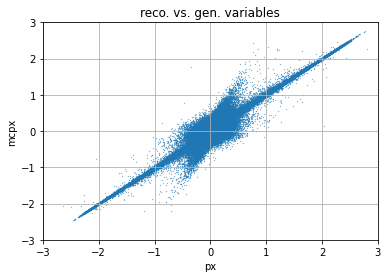

In [47]:
ax = df.plot.scatter("px","mcpx",s=0.05)
ax.set_title("reco. vs. gen. variables")

lim_left = -3
lim_right = -lim_left
ax.set_xlim(left=lim_left, right=lim_right)
ax.set_ylim(bottom=lim_left, top=lim_right)
ax.grid(b=True)

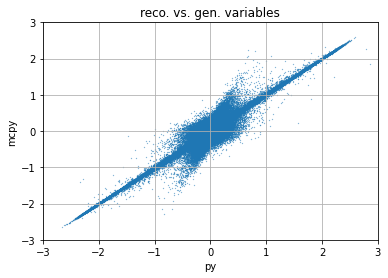

In [48]:
ax = df.plot.scatter("py","mcpy",s=0.05)
ax.set_title("reco. vs. gen. variables")

lim_left = -3
lim_right = -lim_left
ax.set_xlim(left=lim_left, right=lim_right)
ax.set_ylim(bottom=lim_left, top=lim_right)
ax.grid(b=True)

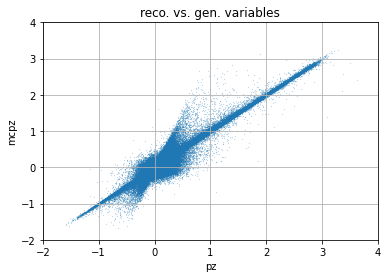

In [49]:
ax = df.plot.scatter("pz","mcpz",s=0.01)
ax.set_title("reco. vs. gen. variables")

lim_left = -2
lim_right = 4
ax.set_xlim(left=lim_left, right=lim_right)
ax.set_ylim(bottom=lim_left, top=lim_right)
ax.grid(b=True)

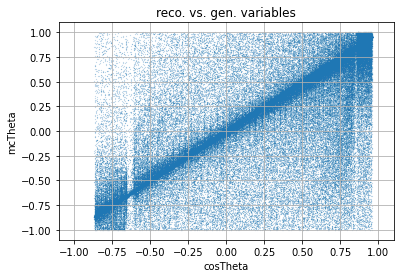

In [50]:
ax = df.plot.scatter("cosTheta","mcTheta",s=0.01)
#ax = df.plot.scatter("cosTheta","mcCostheta",s=0.01)
ax.set_title("reco. vs. gen. variables")

lim_left = -1.1
lim_right = 1.1
ax.set_xlim(left=lim_left, right=lim_right)
ax.set_ylim(bottom=lim_left, top=lim_right)
ax.grid(b=True)

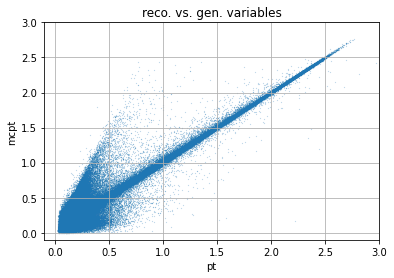

In [51]:
ax = df.plot.scatter("pt","mcpt",s=0.01)
ax.set_title("reco. vs. gen. variables")

lim_left = -0.1
lim_right = 3
ax.set_xlim(left=lim_left, right=lim_right)
ax.set_ylim(bottom=lim_left, top=lim_right)
ax.grid(b=True)

In [33]:
df["px"]

0         0.323785
1        -0.676673
2         0.473872
3        -0.206944
4        -0.334932
            ...   
831558    0.006050
831559    0.000926
831560   -0.010697
831561    0.110914
831562    0.147720
Name: px, Length: 831563, dtype: float64